In [1]:
import numpy
from matplotlib import pyplot
%matplotlib inline


In [2]:
L =1.
nt =100
nx =51
alpha = 1.22e-3
q = 0
dx = L/(nx-1)
qdx = q*dx
Ti=numpy.zeros(nx)
Ti[0] = 100

In [3]:
from scipy.linalg import solve

In [4]:
def generateMatrix(N,sigma):
    
    d = numpy.diag(numpy.ones(N-2)*(2+1./sigma))
    d[-1,-1] = 1+1./sigma
    ud = numpy.diag(numpy.ones(N-3)*-1,1)
    ld = numpy.diag(numpy.ones(N-3)*-1,-1)
    
    A = d + ud + ld
    return A

In [5]:
def generateRHS(T,sigma,qdx):
    
    b = T[1:-1]*1./sigma
    b[0] +=T[0]
    b[-1] += qdx
    
    return b

In [10]:
def Implicit_btcs(T,A,nt,sigma,qdx):
    
    for t in range(nt):
        Tn = T.copy()
        b = generateRHS(Tn,sigma,qdx)
        T_interior = solve(A,b)
        T[1:-1] = T_interior
        T[-1] = T[-2] +qdx
        
    return T

In [11]:
sigma = 0.5
dt = sigma*dx*dx/alpha
nt= 1000
A = generateMatrix(nx,sigma)

In [12]:
print(A)

[[ 4. -1.  0. ...,  0.  0.  0.]
 [-1.  4. -1. ...,  0.  0.  0.]
 [ 0. -1.  4. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  4. -1.  0.]
 [ 0.  0.  0. ..., -1.  4. -1.]
 [ 0.  0.  0. ...,  0. -1.  3.]]


In [13]:
T = Implicit_btcs(Ti.copy(),A,nt,sigma,qdx)

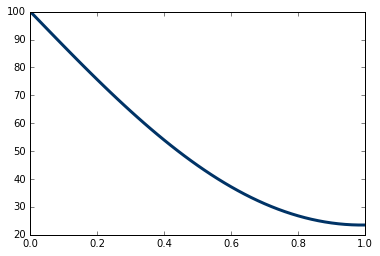

In [14]:
pyplot.plot(numpy.linspace(0,1,nx), T, color='#003366', ls='-', lw=3);

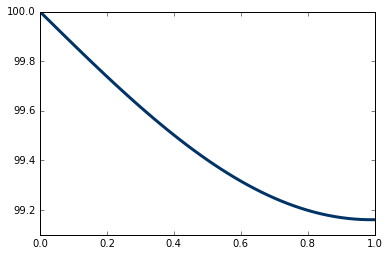

In [16]:
sigma = 5.0

A = generateMatrix(nx, sigma)

T = Implicit_btcs(Ti.copy(), A, nt, sigma, qdx)

pyplot.plot(numpy.linspace(0,1,nx), T, color='#003366', ls='-', lw=3);